In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_excel('C:\\Users\\pavankumar.muniswamy\\Downloads\\excelsss\\executions\\New folder (2)\\final_comparision_excel_jupyter.xlsx')
df.head()

,Category_of_element,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,User_decision
0,Text,0,0,0,0,0,Pass
1,Text,0,0,0,0,0,Pass
2,Text,0,0,0,0,0,Pass
3,Link_Newtab,0,0,0,0,0,Pass
4,Link_Newtab,0,0,0,0,0,Pass


In [32]:
category=df[['Category_of_element']]
category=pd.get_dummies(df.Category_of_element)
category

,Link_Newtab,POP_UP,Text
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
3049,0,1,0
3050,0,1,0
3051,0,1,0
3052,0,1,0


In [33]:
final_df=pd.concat([df,category],axis='columns')
final_df

,Category_of_element,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,User_decision,Link_Newtab,POP_UP,Text
0,Text,0,0,0,0,0,Pass,0,0,1
1,Text,0,0,0,0,0,Pass,0,0,1
2,Text,0,0,0,0,0,Pass,0,0,1
3,Link_Newtab,0,0,0,0,0,Pass,1,0,0
4,Link_Newtab,0,0,0,0,0,Pass,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3049,POP_UP,1,1,1,1,1,Fail,0,1,0
3050,POP_UP,1,1,1,1,1,Fail,0,1,0
3051,POP_UP,1,1,1,1,1,Fail,0,1,0
3052,POP_UP,1,1,1,1,1,Fail,0,1,0


In [35]:
final=final_df.drop(['Category_of_element'],axis='columns')
final.head()

,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,User_decision,Link_Newtab,POP_UP,Text
0,0,0,0,0,0,Pass,0,0,1
1,0,0,0,0,0,Pass,0,0,1
2,0,0,0,0,0,Pass,0,0,1
3,0,0,0,0,0,Pass,1,0,0
4,0,0,0,0,0,Pass,1,0,0


In [36]:
final.replace({"Pass": 1,"Fail": 0}, inplace = True)

In [37]:
final.head(10)

,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,User_decision,Link_Newtab,POP_UP,Text
0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,1,1,0,0
5,0,0,0,0,0,1,0,0,1
6,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,1,0,0,1
8,0,0,0,0,0,1,0,0,1
9,0,0,0,0,0,1,0,1,0


In [38]:
zero=final[final['User_decision']==0]
one=final[final['User_decision']==1]

In [39]:
print(zero.shape,one.shape)

(1113, 9) (1941, 9)


In [44]:
count_class_1, count_class_0 = final.User_decision.value_counts()
count_class_0

1113

In [41]:
over_sample_0=zero.sample(count_class_1,replace=True)
len(over_sample_0)


1941

In [47]:
df_test=pd.concat([one,over_sample_0],axis=0)
df_test.head()

,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,User_decision,Link_Newtab,POP_UP,Text
0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,1,1,0,0


In [46]:
print("random over sampling")
print(df_test.User_decision.value_counts())

random over sampling
0    1941
1    1941
Name: User_decision, dtype: int64


In [50]:
X = df_test.drop('User_decision',axis='columns')
y = df_test.User_decision
X.head()

,Change_in_ItemVisibletouser,Change_in_Element_properties,Change_in_precondition,Change_in_postcondition,Change_in_item_type,Link_Newtab,POP_UP,Text
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [53]:
len(X_test)

777

In [54]:
y_train.value_counts()

0    1564
1    1541
Name: User_decision, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [56]:
model.score(X_test, y_test)

0.9742599742599742

In [58]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [59]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[369,   8],
       [ 12, 388]], dtype=int64)

Text(69.0, 0.5, 'Truth')

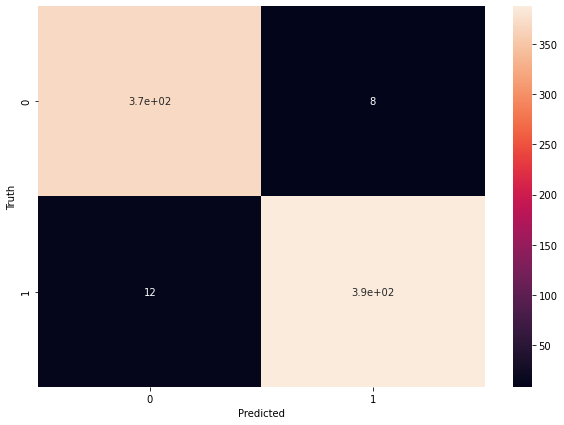

In [60]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       377
           1       0.98      0.97      0.97       400

    accuracy                           0.97       777
   macro avg       0.97      0.97      0.97       777
weighted avg       0.97      0.97      0.97       777



In [ ]:
import pickle

In [ ]:
with open('C:\\Users\\pavankumar.muniswamy\\Downloads\\excelsss\\model_pickle','wb') as file:
    pickle.dump(model,file)

In [ ]:
with open('C:\\Users\\pavankumar.muniswamy\\Downloads\\excelsss\\model_pickle','rb') as file:
    mp = pickle.load(file)

In [ ]:
mp.predict([[1,1,0,1,1,0,1,0]])

In [ ]:


obj = pd.read_pickle(r'C:\\Users\\pavankumar.muniswamy\\Downloads\\excelsss\\model_pickle')
obj

In [ ]:
obj.predict([[0,0,1,0,0,0,0,1]])